# Cargar el dataset

In [3]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set_style("whitegrid")

# Cargar el dataset (reemplaza 'movies.csv' con la ruta real de tu archivo)
df = pd.read_csv("/content/TMDB_movie_dataset_v11.csv")

# Ver las primeras filas del dataset
print(df.head())


       id            title  vote_average  vote_count    status release_date  \
0   27205        Inception         8.364       34495  Released   2010-07-15   
1  157336     Interstellar         8.417       32571  Released   2014-11-05   
2     155  The Dark Knight         8.512       30619  Released   2008-07-16   
3   19995           Avatar         7.573       29815  Released   2009-12-15   
4   24428     The Avengers         7.710       29166  Released   2012-04-25   

      revenue  runtime  adult                     backdrop_path  ...  \
0   825532764      148  False  /8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg  ...   
1   701729206      169  False  /pbrkL804c8yAv3zBZR4QPEafpAR.jpg  ...   
2  1004558444      152  False  /nMKdUUepR0i5zn0y1T4CsSB5chy.jpg  ...   
3  2923706026      162  False  /vL5LR6WdxWPjLPFRLe133jXWsh5.jpg  ...   
4  1518815515      143  False  /9BBTo63ANSmhC4e6r62OJFuK2GL.jpg  ...   

    original_title                                           overview  \
0        Inception 

# Manejo de Valores Nulos

## Mostrar el porcentaje de valores nulos por columna

In [4]:
# Mostrar el porcentaje de valores nulos por columna
missing_values = df.isnull().sum() / len(df) * 100
print("Porcentaje de valores nulos por columna:")
print(missing_values[missing_values > 0].sort_values(ascending=False))



Porcentaje de valores nulos por columna:
homepage                89.452003
tagline                 85.983038
backdrop_path           73.631341
keywords                73.148197
production_companies    55.081843
imdb_id                 47.598783
production_countries    44.740981
spoken_languages        43.029830
genres                  40.482301
poster_path             31.975960
overview                20.582804
release_date            17.022238
title                    0.001119
original_title           0.001119
dtype: float64


## Manejo de valores nulos

In [5]:
# Eliminar columnas con demasiados valores nulos (ejemplo: backdrop_path, homepage, tagline)
df.drop(columns=["backdrop_path", "homepage", "tagline", "keywords"], inplace=True)

# Rellenar valores nulos en 'production_companies' con 'Desconocido'
df["production_companies"].fillna("Desconocido", inplace=True)

# Rellenar valores nulos en 'imdb_id' con 'Desconocido'
df["imdb_id"].fillna("Desconocido", inplace=True)

# Rellenar valores nulos en 'production_countries' con 'No especificado'
df["production_countries"].fillna("No especificado", inplace=True)

# Rellenar valores nulos en 'spoken_languages' con 'No especificado'
df["spoken_languages"].fillna("No especificado", inplace=True)

# Rellenar valores nulos en 'genres' con 'No Especificado'
df["genres"].fillna("No Especificado", inplace=True)

# Rellenar valores nulos en 'poster_path' con 'No disponible'
df["poster_path"].fillna("No disponible", inplace=True)

# Rellenar valores nulos en 'overview' con 'No disponible'
df["overview"].fillna("No disponible", inplace=True)

# Rellenar valores nulos en 'release_date' con 'Desconocido'
df["release_date"].fillna("Desconocido", inplace=True)



<ipython-input-5-605f0f90a8f9>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["production_companies"].fillna("Desconocido", inplace=True)
<ipython-input-5-605f0f90a8f9>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

### Muestra aleatoria para confirmar cambios

In [6]:
df.sample(10)  # Muestra aleatoria de 10 filas

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,imdb_id,original_language,original_title,overview,popularity,poster_path,genres,production_companies,production_countries,spoken_languages
769690,457210,Killswitch Engage - Beyond The Flames: Home Vi...,0.000,0,Released,Desconocido,0,0,False,0,Desconocido,en,Killswitch Engage - Beyond The Flames: Home Vi...,1 - Numbered Days (NE Metal & HC Fest - Worces...,0.600,/1AkJSuooVAZcN3kHH9m1VBtOK49.jpg,No Especificado,Desconocido,No especificado,No especificado
901908,394452,Upon the Rock,0.000,0,Released,2013-08-27,0,9,False,0,tt3404110,en,Upon the Rock,A man leading a Sisyphean life suddenly has a ...,0.600,No disponible,Adventure,Desconocido,No especificado,No especificado
392175,1143605,Rakka,0.000,0,Released,2017-06-14,0,0,False,0,Desconocido,en,Rakka,No disponible,1.252,No disponible,No Especificado,Desconocido,No especificado,English
847256,279440,Photooxidation,0.000,0,Released,2013-10-04,0,13,False,0,tt9140444,es,Fotooxidación,De-electronation of a molecular entity as a re...,0.600,No disponible,Documentary,Desconocido,Argentina,No Language
27404,384725,Vicky,3.657,51,Released,2016-06-08,0,88,False,0,tt5263324,fr,Vicky,A 30-year-old woman discovers her true self wh...,3.652,/6b78kb1C7jaDleKCSQKZGt2CmXx.jpg,Comedy,Gaumont Distribution,France,French
161096,458152,Jóvenes de la Zona Rosa,5.000,3,Released,1970-05-06,0,95,False,0,tt0251758,es,Jóvenes de la Zona Rosa,"""Mod"" culture in Mexico City.",0.662,/rtgbp6lfJzs4izSNSTIhbYu2Fk0.jpg,No Especificado,Desconocido,No especificado,No especificado
761410,536818,Pecado de Nina,0.000,0,Released,1951-06-01,0,0,False,0,tt0197758,pt,Pecado de Nina,No disponible,0.600,/mC26jsRwLTqAMwJSn2368iHfzP7.jpg,Drama,"Cinedistri, Cinelândia Filmes",Brazil,Portuguese
787266,488736,Tracked,0.000,0,Released,1911-03-06,0,10,False,0,tt0358737,en,Tracked,"A lost film. Dan Barret, a forger, is sought b...",0.600,No disponible,No Especificado,Independent Moving Pictures Co. of America (IMP),United States of America,No especificado
164094,413103,Rondalla,5.000,3,Released,1949-10-06,0,77,False,0,tt0230706,en,Rondalla,Romantic triangle on the hacienda.,0.681,/eb4ovKXjKFuZtXJtvtZr3gfIYAb.jpg,No Especificado,Desconocido,No especificado,No especificado
911166,385731,Dowsing: The Complete Survival Guide,0.000,0,Released,2014-07-01,0,120,False,0,tt4174560,en,Dowsing: The Complete Survival Guide,Dowsing is the art of finding hidden things. I...,0.600,No disponible,Documentary,Reality Entertainment,United States of America,English


# Estadísticas Descriptivas

In [7]:
# --- Estadísticas Descriptivas ---
print("\nResumen estadístico de las calificaciones y popularidad:")
print(df[['vote_average', 'vote_count', 'popularity']].describe())


Resumen estadístico de las calificaciones y popularidad:
       vote_average    vote_count    popularity
count  1.161557e+06  1.161557e+06  1.161557e+06
mean   1.844745e+00  1.846632e+01  1.218589e+00
std    3.005632e+00  3.150874e+02  7.506468e+00
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00  6.000000e-01
50%    0.000000e+00  0.000000e+00  6.000000e-01
75%    4.500000e+00  1.000000e+00  8.740000e-01
max    1.000000e+01  3.449500e+04  2.994357e+03


# Visualizaciones

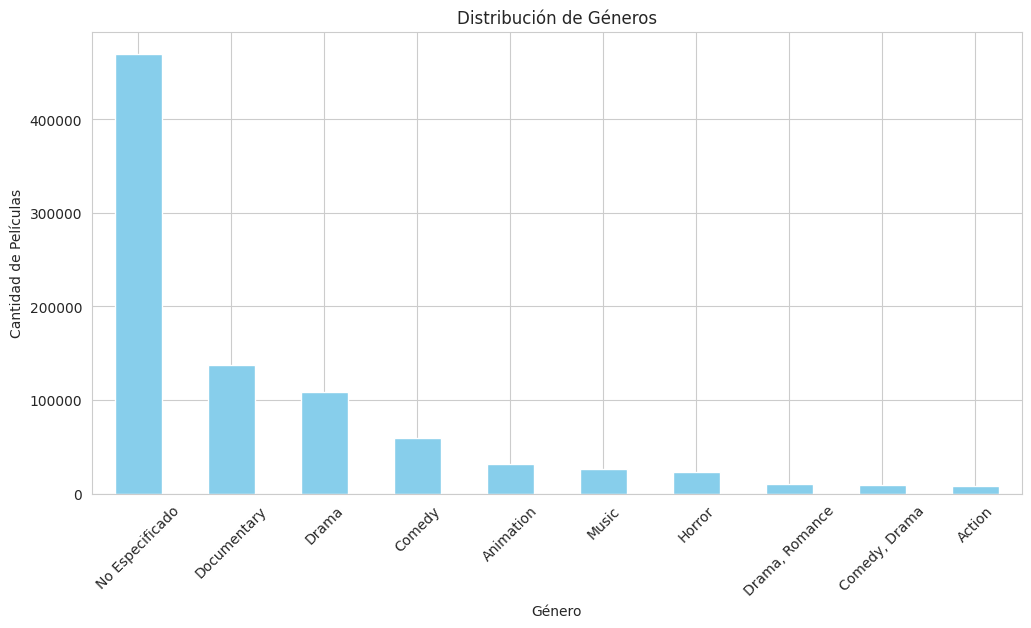

In [8]:
# 3.1 Distribución de géneros
plt.figure(figsize=(12,6))
top_genres = df['genres'].value_counts().head(10)  # Los 10 géneros más comunes
top_genres.plot(kind='bar', color='skyblue')
plt.title("Distribución de Géneros")
plt.xlabel("Género")
plt.ylabel("Cantidad de Películas")
plt.xticks(rotation=45)
plt.show()


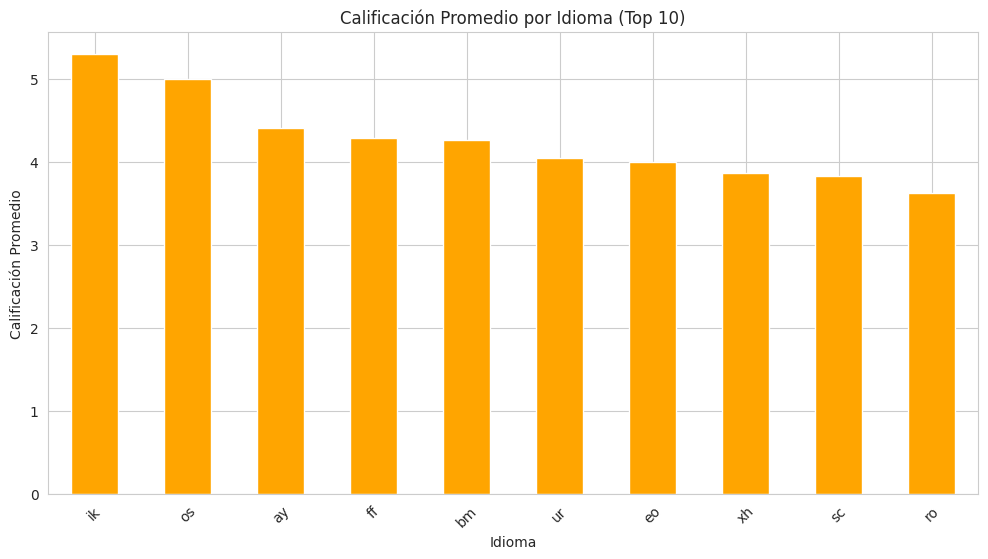

In [9]:
# 3.2 Tendencias de calificaciones por idioma
plt.figure(figsize=(12,6))
avg_ratings_per_lang = df.groupby('original_language')['vote_average'].mean().sort_values(ascending=False).head(10)
avg_ratings_per_lang.plot(kind='bar', color='orange')
plt.title("Calificación Promedio por Idioma (Top 10)")
plt.xlabel("Idioma")
plt.ylabel("Calificación Promedio")
plt.xticks(rotation=45)
plt.show()



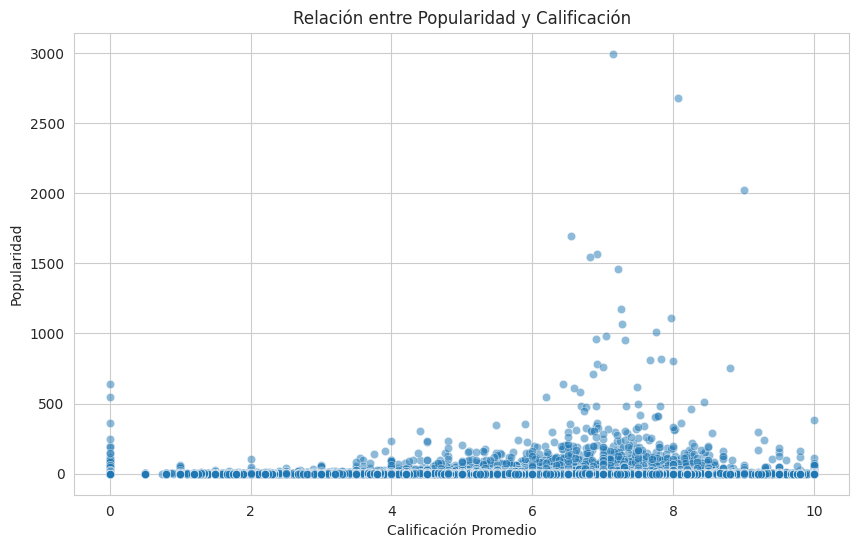

In [10]:
# 3.3 Relación entre Popularidad y Calificación
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['vote_average'], y=df['popularity'], alpha=0.5)
plt.title("Relación entre Popularidad y Calificación")
plt.xlabel("Calificación Promedio")
plt.ylabel("Popularidad")
plt.show()


Matriz de correlación entre popularidad y calificación:
              vote_average  popularity
vote_average       1.00000     0.11949
popularity         0.11949     1.00000


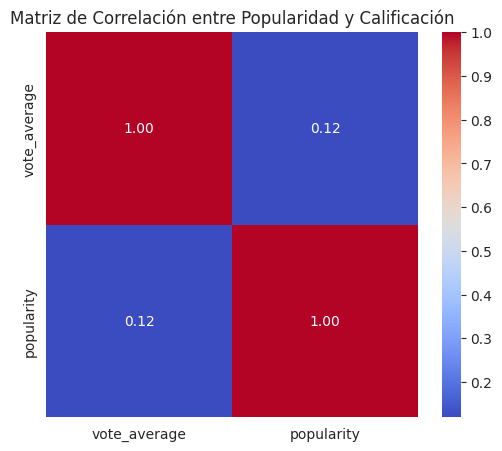

In [11]:
# 3.4 Análisis de correlación entre popularidad y calificación
correlation = df[['vote_average', 'popularity']].corr()
print("\nMatriz de correlación entre popularidad y calificación:")
print(correlation)

plt.figure(figsize=(6,5))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Popularidad y Calificación")
plt.show()

## Identificación de patrones destacados

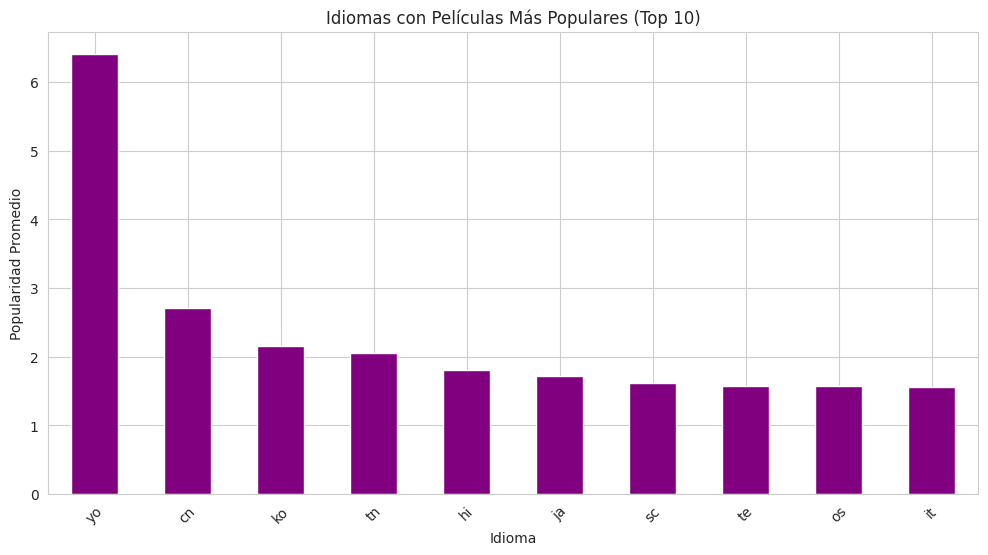

In [12]:
# Idiomas con películas más populares
plt.figure(figsize=(12,6))
top_languages = df.groupby("original_language")["popularity"].mean().sort_values(ascending=False).head(10)
top_languages.plot(kind='bar', color='purple')
plt.title("Idiomas con Películas Más Populares (Top 10)")
plt.xlabel("Idioma")
plt.ylabel("Popularidad Promedio")
plt.xticks(rotation=45)
plt.show()

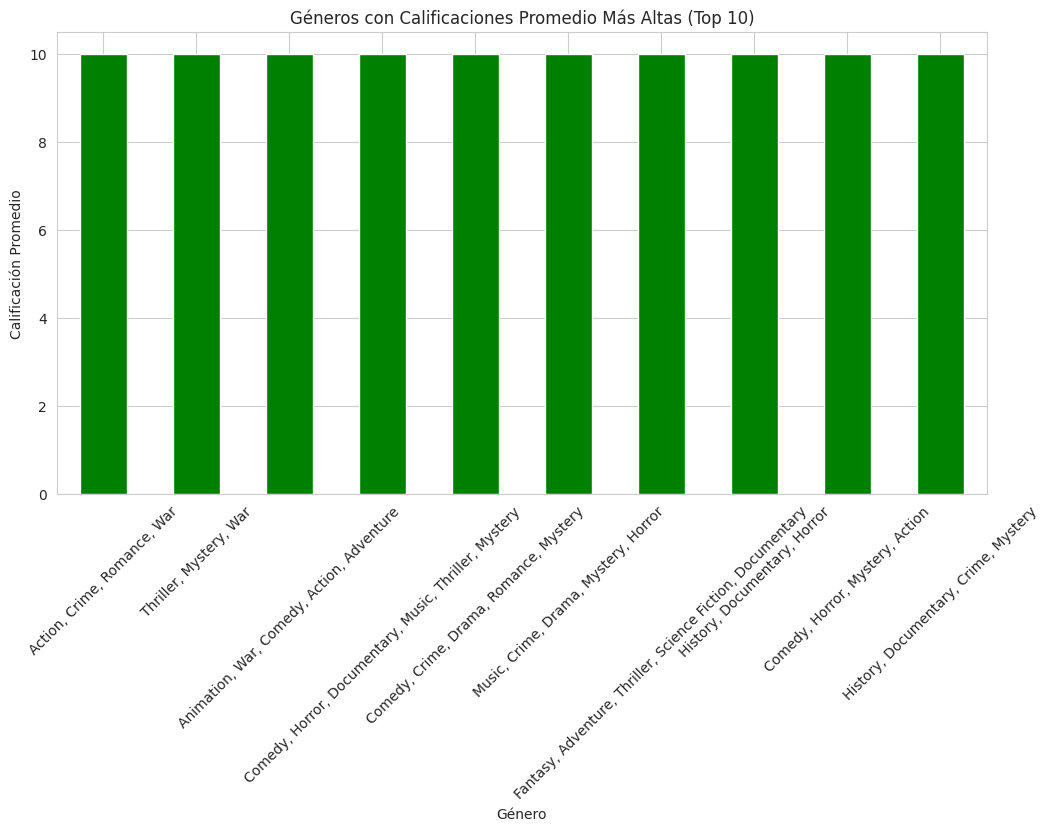

In [13]:
# Géneros con calificaciones promedio más altas
plt.figure(figsize=(12,6))
top_genre_ratings = df.groupby("genres")["vote_average"].mean().sort_values(ascending=False).head(10)
top_genre_ratings.plot(kind='bar', color='green')
plt.title("Géneros con Calificaciones Promedio Más Altas (Top 10)")
plt.xlabel("Género")
plt.ylabel("Calificación Promedio")
plt.xticks(rotation=45)
plt.show()